In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df_corr = df[['price', 'area', 'bedrooms', 'bathrooms']].corr()
df_corr

,price,area,bedrooms,bathrooms
price,1.000000,0.535997,0.366494,0.517545
area,0.535997,1.000000,0.151858,0.193820
bedrooms,0.366494,0.151858,1.000000,0.373930
bathrooms,0.517545,0.193820,0.373930,1.000000


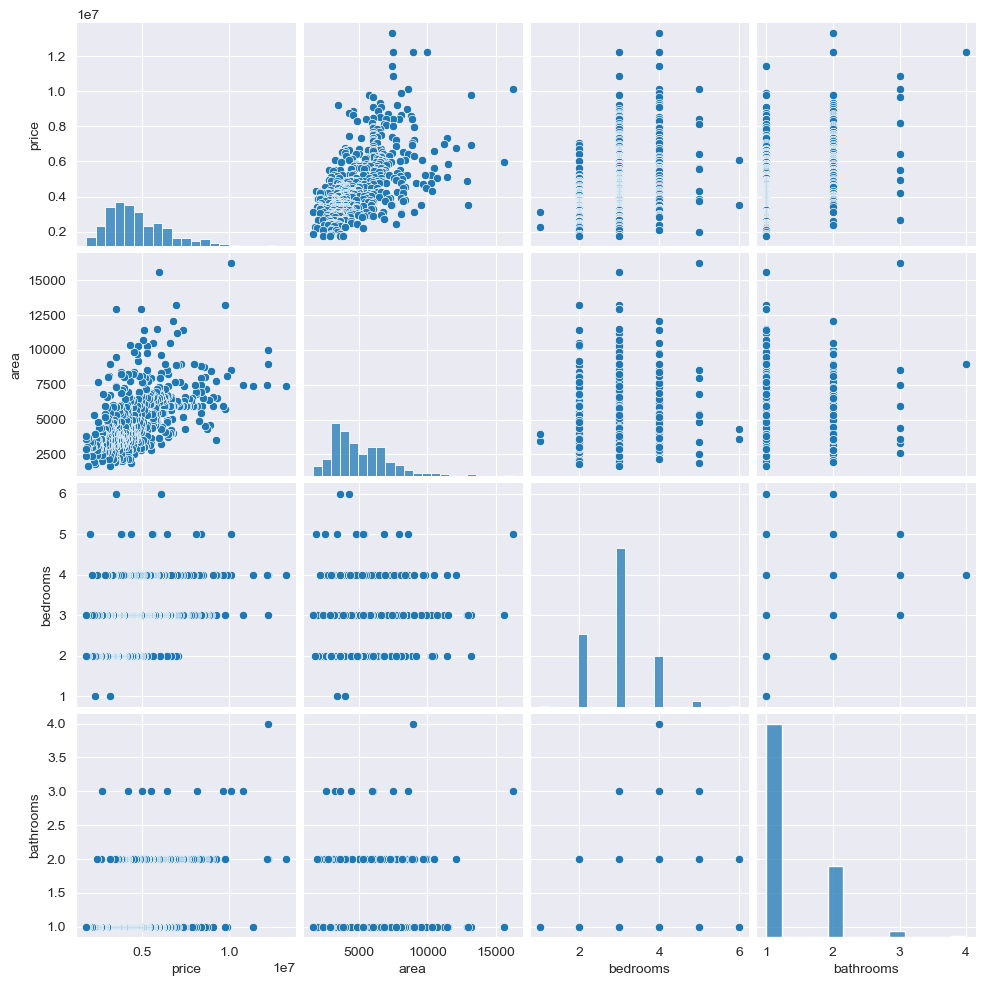

In [4]:
import warnings
# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style('darkgrid')
sns.pairplot(df, vars=['price', 'area', 'bedrooms',	'bathrooms'])
plt.show()

## Linear regression

$$h(\overrightarrow{x}) = \overrightarrow{w} * \overrightarrow{x}$$

In [5]:
def hypothesis(X, w):
    return np.dot(X, w)

In [7]:
def compute_cost(X, y, w):
    m = len(y)
    h = hypothesis(X, w)
    cost = (1/(2*m)) * np.sum((h - y)**2)
    return cost

In [8]:
def gradient_descent_step(X, y, w, learning_rate = 0.001):
    m = len(y)
    h = hypothesis(X, w)
    gradient = np.dot(X.T, (h - y)) / m
    w -= learning_rate * gradient
    return w

In [9]:
def gradient_descent(X, y, w, num_iterations, learning_rate = 0.001):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        w = gradient_descent_step(X, y, w, learning_rate)
        cost_history[i] = compute_cost(X, y, w)
    
    return w, cost_history

In [10]:
X = df.iloc[:,[1, 2 ,3]]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])
X_scaled

array([[ 1.        ,  1.04672629,  1.40341936,  1.42181174],
       [ 1.        ,  1.75700953,  1.40341936,  5.40580863],
       [ 1.        ,  2.21823241,  0.04727831,  1.42181174],
       ...,
       [ 1.        , -0.70592066, -1.30886273, -0.57018671],
       [ 1.        , -1.03338891,  0.04727831, -0.57018671],
       [ 1.        , -0.5998394 ,  0.04727831, -0.57018671]])

In [12]:
y = df.iloc[:, 0].values
y = y.reshape(-1, 1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)
y_scaled[:6]

array([[4.56636513],
       [4.00448405],
       [4.00448405],
       [3.98575468],
       [3.55497918],
       [3.25530927]])

In [70]:
w = np.zeros((X_scaled.shape[1], 1))

In [140]:
w, history = gradient_descent(X_scaled, y_scaled, w, 1000, learning_rate = 0.001)

In [141]:
w

array([[2.99042340e-16],
       [4.37239875e-01],
       [1.65008300e-01],
       [3.69068018e-01]])

In [142]:
history

array([0.25651099, 0.25651091, 0.25651083, 0.25651076, 0.25651068,
       0.2565106 , 0.25651052, 0.25651044, 0.25651036, 0.25651029,
       0.25651021, 0.25651013, 0.25651005, 0.25650997, 0.2565099 ,
       0.25650982, 0.25650974, 0.25650967, 0.25650959, 0.25650951,
       0.25650943, 0.25650936, 0.25650928, 0.25650921, 0.25650913,
       0.25650905, 0.25650898, 0.2565089 , 0.25650883, 0.25650875,
       0.25650867, 0.2565086 , 0.25650852, 0.25650845, 0.25650837,
       0.2565083 , 0.25650822, 0.25650815, 0.25650807, 0.256508  ,
       0.25650793, 0.25650785, 0.25650778, 0.2565077 , 0.25650763,
       0.25650756, 0.25650748, 0.25650741, 0.25650733, 0.25650726,
       0.25650719, 0.25650712, 0.25650704, 0.25650697, 0.2565069 ,
       0.25650682, 0.25650675, 0.25650668, 0.25650661, 0.25650653,
       0.25650646, 0.25650639, 0.25650632, 0.25650625, 0.25650618,
       0.2565061 , 0.25650603, 0.25650596, 0.25650589, 0.25650582,
       0.25650575, 0.25650568, 0.25650561, 0.25650554, 0.25650

## Scikit-learn Linear Regression

In [74]:
from sklearn import linear_model

In [75]:
model = linear_model.LinearRegression()

In [133]:
X_scaled.shape

(545, 4)

In [134]:
Y = y_scaled
Y.shape

(545, 1)

In [135]:
model.fit(X, Y)

LinearRegression()

In [136]:
model.coef_

array([[2.02685357e-04, 2.17699505e-01, 7.41709512e-01]])

In [137]:
model.intercept_

array([-2.64346364])

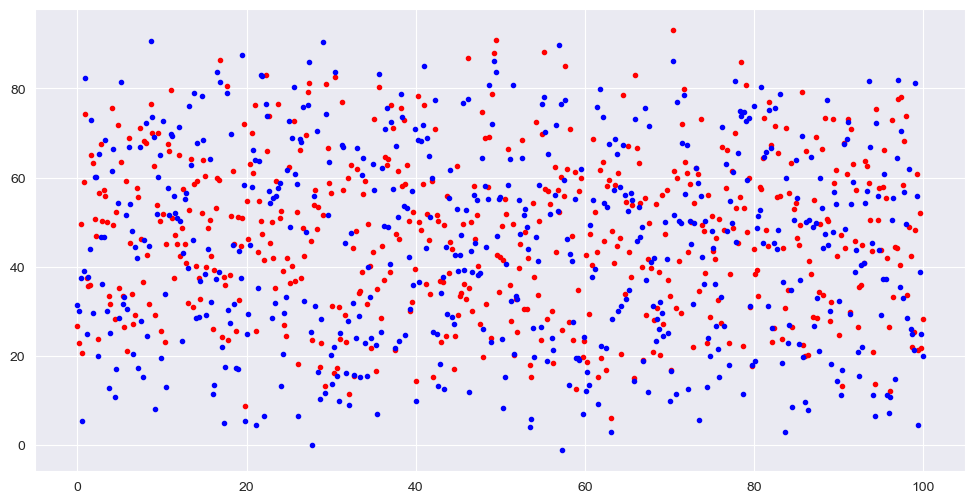

In [147]:
plt.figure(figsize=(12, 6))
x_axis = np.linspace(0, 100, 545)
x_matrix = np.random.rand(545, 3) * 100  # Генеруємо випадкові значення для площі, кількості ванних кімнат та кількості спалень
x_matrix = np.hstack((np.ones((545, 1)), x_matrix))
model_cof = []
model_cof.append(model.intercept_[0])
for i in model.coef_[0]:
    model_cof.append(i)
plt.plot(x_axis, hypothesis(x_matrix, w), 'r.')
plt.plot(x_axis, hypothesis(x_matrix, model_cof), 'b.')